# Center, Spread, Normal Distribution

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 

This team homework is based on Lecture 25: Center and Spread, Lecture 26: Normal Distribution and Lecture 27: Sample Means. 

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Mean and Median](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html#)
- [Standard Deviation](https://inferentialthinking.com/chapters/14/2/Variability.html)
- [Central Limit Theorem for proportions](https://inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html)
- [Central Limit Theorem for Sample Means](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html)

In [1]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
from scipy import stats

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

### Mean, Median, Standard Deviation

Find the mean, median and standard deviation of the following data set: 19, 19, 20, 22. Do your work either on paper or using the Python command line *without* the use of `np` package. 

Use the student data and `np` functions (`np.average`, `np.median`, `np.std`) to answer questions about the center and spread. 

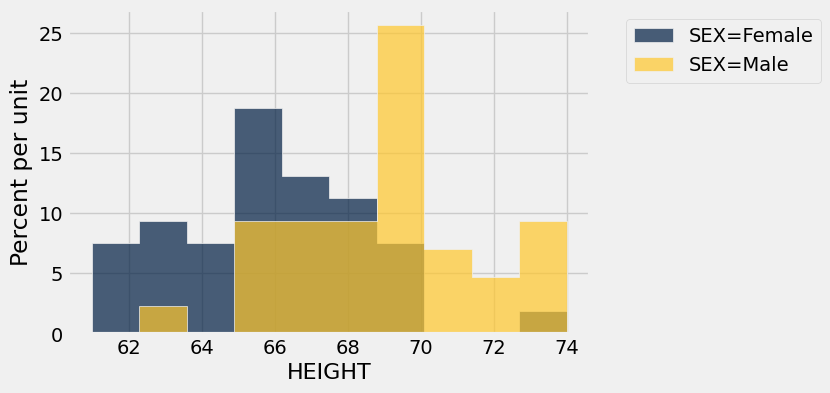

In [3]:
students = Table().read_table('student_data.csv')
students.hist('HEIGHT', group='SEX')

Find the mean, median and the standard deviation of female and male students, respectively. 

Examine the tallest female student and the tallest male student. Relatively speaking, who is taller in terms of the standard units (z score)? 

### Estimating Standard Deviation 

In addition to observing the inflection point on the histogram, another method of estimating standard deviation from the histogram is to use the interval [a, b] that identifies the middle 95% of the total area, and use $std \approx \frac{(b-a)}{4}$. This works best when the distribution was approximately bell shaped and symmetric. 

Use this method to estimate the standard deviation from the following distributions. 

<img src="bootstrap_mean.GIF" width=600>
<img src="bootstrap_proportion.png" width=600>

In [ ]:
# Enter your estimate of the standard deviation 




Using the histograms for student height data above, estimate the standard deviation of female and male height, respectively. How does your results compare with `np.std`?

### Normal Distribution 

Be sure to import the `scipy.stats` package done in the beginning of the notebook. We will use `plot_normal_cdf` and the `stats.norm.cdf` functions together.

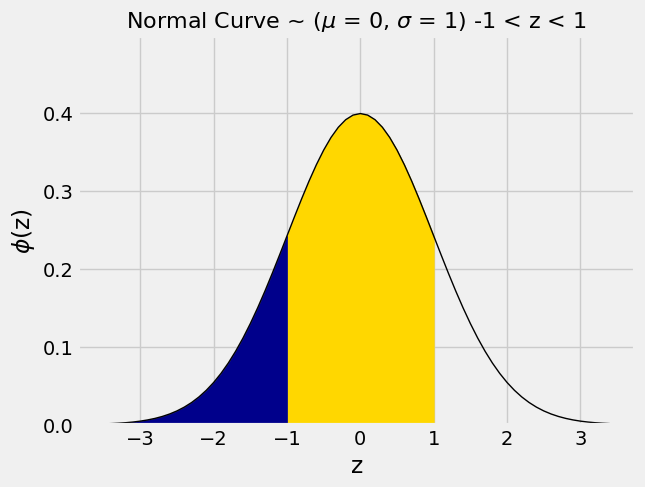

In [7]:
plot_normal_cdf(lbound = -1, rbound = 1)

Use `stats.norm.cdf` to find the area between z = -1.5 and 0.5 

Find the area to the right of z = 3

Use the mean and standard deviation of the male and female students and use ```plot_normal_cdf(rbound, lbound, mean, sd)``` to create a similar graph as the one shown for $P(-1<z<1)$, but in different scales. 

Examine the following code. What does the `stats.norm.ppf` function do? Describe it in your own words. 

In [28]:
a = stats.norm.ppf(0.05)
b = stats.norm.ppf(0.95)
stats.norm.cdf(b) - stats.norm.cdf(a)

0.90000000000000002

Use `stats.norm.ppf` to identify z-scores that identify the middle 50% of the area under the standard normal distribution. 

Using the same height data, we can draw two normal curves with the respective mean and standard deviation of male and female students and superimpose them on the original histogram. 

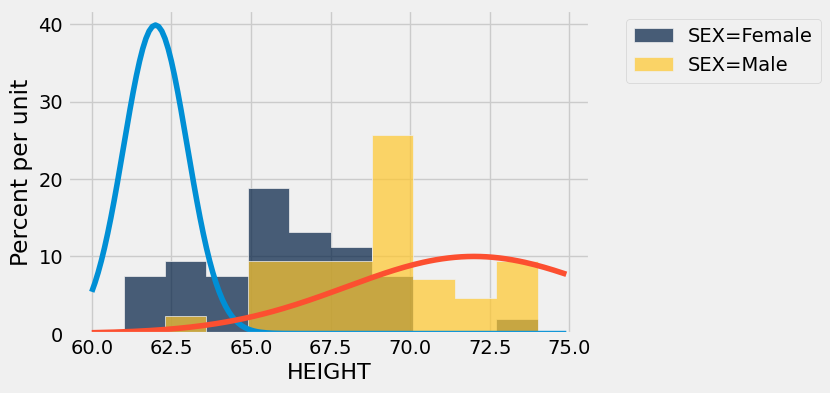

In [11]:
students = Table().read_table('student_data.csv')
students.hist('HEIGHT', group='SEX')

# keep these x ranges 
x = np.arange(60, 75, 0.1)
# replace the mean and standard deviation with the values found above.  
yf = stats.norm.pdf(x, 62, 1)
ym = stats.norm.pdf(x, 72, 4)

plots.plot(x, yf, x, ym)

### Central Limit Theorem 

Treat the student data as the population, and simulate drawing samples of 4 from the population. Be sure to use sampling with replacement. Show the histogram of your sample means and find its mean and standard deviation. 

(22.351351351351351, 6.537692031043405)

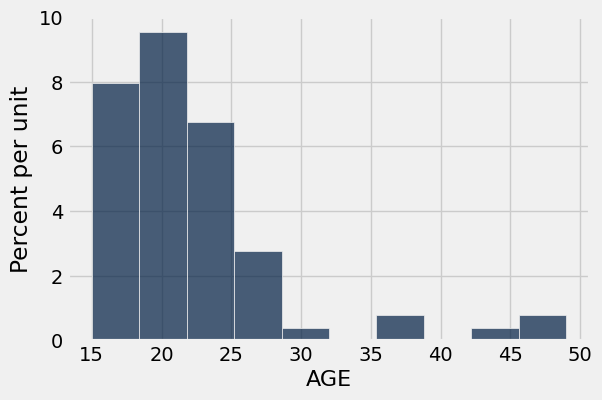

In [4]:
students.hist('AGE')
all_ages = students.column('AGE')
np.average(all_ages), np.std(all_ages)

In [33]:
students.sample(4)

SEX,COLOR,ZIP,MATH,PAPER,CAR,SHOE,AGE,HEIGHT,PETS,SOCIAL
Female,Blue,95492,1,3,2014,8,24,65,1,No
Female,Other,95404,2,1,1998,10,44,69,3,No
Female,Blue,95403,4,3,nan,9,19,67,0,Yes
Female,Blue,95403,3,4,2007,10,18,68,1,No


Now repeat your experiment by increasing the sample size to 16. What happened to the mean and standard deviation? 

How does your finding compare with the predictions of [Central Limit Theorem](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) ? You can add the following code to your histogram in order to compare the normal curve with the histogram. 

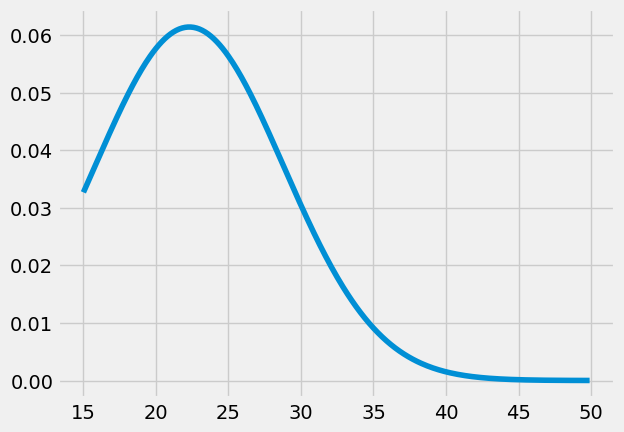

In [5]:
mean = 22.3
stdev = 6.5
x = np.arange(15, 50, 0.1)
y = stats.norm.pdf(x, mean, stdev)
plots.plot(x, y)